<a href="https://colab.research.google.com/github/anandaviana/Analise-adote-petz/blob/main/02_Petz_Dataframes_AnaliseMacro_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criando o dataframe com os dados semanais

In [ ]:
# Importações

import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta
import plotly.express as px
import seaborn as sns

In [ ]:
#Listando os arquivos existentes
arquivos = os.listdir('/content/drive/MyDrive/Petz/csv/')
arquivos = sorted(arquivos)
print(arquivos)

['dados_2024-12-07.json', 'project_petz_01.csv', 'project_petz_01.gsheet', 'project_petz_02.csv', 'project_petz_02.gsheet', 'project_petz_03.csv', 'project_petz_04.csv', 'project_petz_05.csv', 'project_petz_06.csv', 'project_petz_07.csv', 'project_petz_08.csv', 'project_petz_09.csv', 'project_petz_10.csv', 'project_petz_11.csv', 'project_petz_12.csv', 'project_petz_13.csv', 'project_petz_14.csv', 'teste.csv', 'todos_gatos.csv']


In [ ]:
#Simplificando o nome dos arquivos

semanas = {}
for arquivo in arquivos:
  if not 'csv' in arquivo or not 'petz_' in arquivo:
    continue
  print(arquivo)
  semana_id = arquivo.split('_')[2].split('.')[0]

  semanas[semana_id] = pd.read_csv('/content/drive/MyDrive/Petz/csv/' + arquivo, sep=';')


project_petz_01.csv
project_petz_02.csv
project_petz_03.csv
project_petz_04.csv
project_petz_05.csv
project_petz_06.csv
project_petz_07.csv
project_petz_08.csv
project_petz_09.csv
project_petz_10.csv
project_petz_11.csv
project_petz_12.csv
project_petz_13.csv
project_petz_14.csv


In [ ]:
#Combinando os dataframes em um único (sem repetir os gatos)

todos_gatos = pd.DataFrame()  # DataFrame para armazenar dados únicos
permanência = {}  # Dicionário para rastrear a permanência de cada ID

for semana_id, df in semanas.items():
    # Verificar se cada mouraID está em todos_gatos e atualizar a permanência
    for moura_id in df['mouraID']:
        if moura_id in permanência:
            # Se já existe, incrementa a permanência
            permanência[moura_id] += 1
            #teste:
            if moura_id == 3302550:
              print(permanência[moura_id])
        else:
            # Se não existe, adiciona ao DataFrame todos_gatos
            todos_gatos = pd.concat([todos_gatos, df[df['mouraID'] == moura_id]], ignore_index=True)
            permanência[moura_id] = 0  # Inicializa a permanência como 0

# Atualiza a coluna de permanência no DataFrame todos_gatos
todos_gatos['PERMANÊNCIA'] = todos_gatos['mouraID'].map(permanência)

# Verifica os resultados
#print("Dicionário de permanência:", permanência)


# Filtrando os gatos cuja entrada seja uma data específica
gatos_na_data = todos_gatos[todos_gatos['ENTRADA'] == '2024-10-19']
todos_gatos['ENTRADA'] = pd.to_datetime(todos_gatos['ENTRADA'])


#Salvando em csv
#todos_gatos.to_csv(f'/content/drive/MyDrive/Petz/csv/teste.csv', index =False, sep =';')


1
2
3
4
5
6
7
8
9
10
11
12
13


In [ ]:
#Criando faixas etárias

def faixa_etaria(idade):
  if idade <12:
    return 'FILHOTE'
  elif 24> idade >= 12:
    return 'JUNIOR'
  elif 72> idade >= 24:
    return 'ADULTO'
  elif idade >= 72:
    return'SENIOR'


In [ ]:
#Aplicando a função e criando a coluna 'FAIXA ETÁRIA'

todos_gatos['FAIXA ETARIA'] = todos_gatos['IDADE (MESES)'].apply(faixa_etaria)

todos_gatos

,mouraID,NOME,SEXO,PORTE,CAD PETZ ID,DATA DE NASCIMENTO,PESO,FOTO,UNIDADE PETZ,CIDADE,ESTADO,IDADE (MESES),FILHOTE,ENTRADA,PERMANÊNCIA,FAIXA ETARIA
0,2813670,ADONIS,MALE,Pequeno,4543672,2021-03-26,0.0,https://s3.amazonaws.com/petz-cdm-stg/bcc13b3c...,Petz Washington Soares,FORTALEZA,CE,43,False,2024-09-22,8,ADULTO
1,4661953,AGNES,FEMALE,Pequeno,7171114,2024-01-12,3.0,https://s3.amazonaws.com/petz-cdm-stg/c2cdb4f5...,Petz Marginal Tiete,SAO PAULO,SP,9,True,2024-09-22,0,FILHOTE
2,2813671,AKILA,MALE,Pequeno,4543673,2021-03-26,0.0,https://s3.amazonaws.com/petz-cdm-stg/d8d04dbb...,Petz Washington Soares,FORTALEZA,CE,43,False,2024-09-22,8,ADULTO
3,4551283,ALANA,FEMALE,Pequeno,7030583,2023-06-04,4.0,https://s3.amazonaws.com/petz-cdm-stg/c37734e3...,Petz Marginal Tiete,SAO PAULO,SP,17,False,2024-09-22,5,JUNIOR
4,4673231,Algodão,MALE,Pequeno,7185882,2023-09-10,3.0,https://s3.amazonaws.com/petz-cdm-stg/91dee215...,Petz Piracicaba,PIRACICABA,SP,13,False,2024-09-22,3,JUNIOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,4759572,Tininha,FEMALE,Pequeno,7301825,2024-01-10,2.0,https://s3.amazonaws.com/petz-cdm-stg/231fef87...,Petz Sorocaba,SOROCABA,SP,11,True,2024-12-21,0,FILHOTE
905,4759494,VIOLA,FEMALE,Pequeno,7301745,2023-11-23,3.0,https://s3.amazonaws.com/petz-cdm-stg/5ca0775e...,Petz Ricardo Jafet 24h,SAO PAULO,SP,13,False,2024-12-21,0,JUNIOR
906,4764878,Vitarella,FEMALE,Pequeno,7308528,2024-09-18,3.0,https://s3.amazonaws.com/petz-cdm-stg/3c594b20...,Petz Cerro Cora,SAO PAULO,SP,3,True,2024-12-21,0,FILHOTE
907,4763899,Voinha,FEMALE,Pequeno,7307301,2014-04-10,3.0,https://s3.amazonaws.com/petz-cdm-stg/5f9c925d...,Petz Iguatemi Esplanada,VOTORANTIM,SP,128,False,2024-12-21,0,SENIOR


# Criando o dataframe para análise de adoções

In [ ]:
#Definindo as semanas válidas para análise de adoção: vamos trabalhar com um intervalo de 4 semanas - que é o tempo que os gatos podem ficar disponíveis na unidade Petz

# Ordenando as datas únicas e convertendo para o formato correto
datas = sorted(todos_gatos['ENTRADA'].unique())
print(datas)

# Definindo a data de corte para 4 semanas atrás
data_limite = datas[-1] - timedelta(weeks=4)

# Filtrando as datas que atendem à condição
datas_4_semanas_ou_mais = [data for data in datas if data <= data_limite]

# Convertendo as datas para strings formatadas sem o horário
lista_datas = [data.strftime('%Y-%m-%d') for data in datas_4_semanas_ou_mais]

# Exibindo a lista de datas
print(lista_datas)

[Timestamp('2024-09-22 00:00:00'), Timestamp('2024-09-28 00:00:00'), Timestamp('2024-10-05 00:00:00'), Timestamp('2024-10-12 00:00:00'), Timestamp('2024-10-19 00:00:00'), Timestamp('2024-10-26 00:00:00'), Timestamp('2024-11-02 00:00:00'), Timestamp('2024-11-09 00:00:00'), Timestamp('2024-11-16 00:00:00'), Timestamp('2024-11-24 00:00:00'), Timestamp('2024-12-01 00:00:00'), Timestamp('2024-12-07 00:00:00'), Timestamp('2024-12-14 00:00:00'), Timestamp('2024-12-21 00:00:00')]
['2024-09-22', '2024-09-28', '2024-10-05', '2024-10-12', '2024-10-19', '2024-10-26', '2024-11-02', '2024-11-09', '2024-11-16']


In [ ]:

#Definindo o conjunto de análise com base nas semanas válidas
conjunto_analise = todos_gatos.loc[todos_gatos['ENTRADA'].isin(lista_datas)]
print(len(conjunto_analise))


637


<ipython-input-8-8db67f9494ce>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  conjunto_analise = todos_gatos.loc[todos_gatos['ENTRADA'].isin(lista_datas)]


In [ ]:
# Remover as informações dos gatos que "entraram" na primeira semana (não se pode saber se de fato entraram nela ou antes)
conjunto_analise = conjunto_analise[conjunto_analise['ENTRADA'] != pd.to_datetime(datas[0])]
conjunto_analise.info()


<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, 190 to 636
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mouraID             447 non-null    int64         
 1   NOME                447 non-null    object        
 2   SEXO                447 non-null    object        
 3   PORTE               447 non-null    object        
 4   CAD PETZ ID         447 non-null    int64         
 5   DATA DE NASCIMENTO  447 non-null    object        
 6   PESO                447 non-null    float64       
 7   FOTO                447 non-null    object        
 8   UNIDADE PETZ        447 non-null    object        
 9   CIDADE              447 non-null    object        
 10  ESTADO              447 non-null    object        
 11  IDADE (MESES)       447 non-null    int64         
 12  FILHOTE             447 non-null    bool          
 13  ENTRADA             447 non-null    datetime64[ns]
 1

In [ ]:
#Definindo o conjunto de adotados: excluímos os gatos que "sumiram" na última semana, pois podem ter voltado à ong, e os com permanência maior que 4, pois pode haver erro de atualização

adotados = conjunto_analise.loc[conjunto_analise['PERMANÊNCIA']<=3]


adotados.info()



<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 190 to 636
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mouraID             328 non-null    int64         
 1   NOME                328 non-null    object        
 2   SEXO                328 non-null    object        
 3   PORTE               328 non-null    object        
 4   CAD PETZ ID         328 non-null    int64         
 5   DATA DE NASCIMENTO  328 non-null    object        
 6   PESO                328 non-null    float64       
 7   FOTO                328 non-null    object        
 8   UNIDADE PETZ        328 non-null    object        
 9   CIDADE              328 non-null    object        
 10  ESTADO              328 non-null    object        
 11  IDADE (MESES)       328 non-null    int64         
 12  FILHOTE             328 non-null    bool          
 13  ENTRADA             328 non-null    datetime64[ns]
 1

In [ ]:
conjunto_analise[conjunto_analise['PERMANÊNCIA']>3].count() #verificando a quantidade de gatos excluídos da amostra

,0
mouraID,119
NOME,119
SEXO,119
PORTE,119
CAD PETZ ID,119
DATA DE NASCIMENTO,119
PESO,119
FOTO,119
UNIDADE PETZ,119
CIDADE,119


In [ ]:
adotados.to_csv(adotados.to_csv(f'/content/drive/MyDrive/Petz/dataframe.csv', index =False, sep =';'))
conjunto_analise.to_csv(conjunto_analise.to_csv(f'/content/drive/MyDrive/Petz/conjunto_analise.csv', index =False, sep =';'))

',mouraID,NOME,SEXO,PORTE,CAD PETZ ID,DATA DE NASCIMENTO,PESO,FOTO,UNIDADE PETZ,CIDADE,ESTADO,IDADE (MESES),FILHOTE,ENTRADA,PERMANÊNCIA,FAIXA ETARIA\n190,4680644,Alagoas,FEMALE,Pequeno,7195572,2020-09-06,4.0,https://s3.amazonaws.com/petz-cdm-stg/c6698ab7-de79-4a6c-b14f-d2fc368f906b.jpeg,Petz Alto da Boa Vista,SAO PAULO,SP,49,False,2024-09-28,2,ADULTO\n191,4679883,ANDRIA,FEMALE,Pequeno,7194608,2024-02-14,2.0,https://s3.amazonaws.com/petz-cdm-stg/fe9cc0c7-f9d0-4a6e-a1eb-ce0c82b51117.jpeg,Petz Bosque Maia,GUARULHOS,SP,8,True,2024-09-28,0,FILHOTE\n192,4595572,ANTONIO,MALE,Pequeno,7086469,2023-10-24,3.0,https://s3.amazonaws.com/petz-cdm-stg/7ba3b91b-d76a-4e66-a068-01beca2efd6e.jpeg,Petz Carrefour São Caetano,SAO CAETANO DO SUL,SP,12,False,2024-09-28,0,JUNIOR\n193,4683592,Ariel,FEMALE,Pequeno,7199267,2024-05-20,2.0,https://s3.amazonaws.com/petz-cdm-stg/eb4e3fff-eaad-4947-af18-cce9dc96cb9f.jpeg,Petz Limão,SAO PAULO,SP,5,True,2024-09-28,4,FILHOTE\n194,4682537,Babi,FEMALE,Pequeno,7197871,2022-0

#Análises

In [ ]:
#Verificando os dados de idade do database

todos_moda = (conjunto_analise['IDADE (MESES)'].mode()).tolist()
todos_total = len(conjunto_analise)
todos_senior = (conjunto_analise['FAIXA ETARIA'] == 'SENIOR').sum()
todos_adultos = (conjunto_analise['FAIXA ETARIA'] == 'ADULTO').sum()
todos_junior = (conjunto_analise['FAIXA ETARIA'] == 'JUNIOR').sum()
todos_filhotes = (conjunto_analise['FAIXA ETARIA'] == 'FILHOTE').sum()


print('Considerando todo o database:')

print(f'As idades mais frequentes são {todos_moda} meses.')
print(f'O total de gatos é {todos_total}.')
print(f'A quantidade de gatos senior é {todos_senior}, sendo {(todos_senior/todos_total)*100:.2f}% to total de gatos disponiveis.')
print(f'A quantidade de gatos adultos é {todos_adultos}, sendo {(todos_adultos/todos_total)*100:.2f}% to total de gatos disponíveis.')
print(f'A quantidade de gatos junior é {todos_junior}, sendo {(todos_junior/todos_total)*100:.2f}% to total de gatos disponíveis.')
print(f'A quantidade de gatos filhotes é {todos_filhotes}, sendo {(todos_filhotes/todos_total)*100:.2f}% to total de gatos disponíveis.')


Considerando todo o database:
As idades mais frequentes são [3] meses.
O total de gatos é 447.
A quantidade de gatos senior é 2, sendo 0.45% to total de gatos disponiveis.
A quantidade de gatos adultos é 77, sendo 17.23% to total de gatos disponíveis.
A quantidade de gatos junior é 111, sendo 24.83% to total de gatos disponíveis.
A quantidade de gatos filhotes é 257, sendo 57.49% to total de gatos disponíveis.


In [ ]:
#Verificando a idade mais comum entre os adotados

adotados_moda = (adotados['IDADE (MESES)'].mode()).tolist()
adotados_total = len(adotados)
adotados_senior = (adotados['FAIXA ETARIA'] == 'SENIOR').sum()
adotados_adultos = (adotados['FAIXA ETARIA'] == 'ADULTO').sum()
adotados_junior = (adotados['FAIXA ETARIA'] == 'JUNIOR').sum()
adotados_filhotes = (adotados['FAIXA ETARIA'] == 'FILHOTE').sum()


print('Considerando os adotados')

print(f'As idades mais frequentes são {adotados_moda} meses.')
print(f'O total de gatos adotados é {adotados_total}, sendo {(adotados_total/todos_total)*100:.2f}% dos gatos diponíveis.')
print(f'A quantidade de gatos senior é {adotados_senior}, sendo {(adotados_senior/adotados_total)*100:.2f}% to total de adotados. Foram adotados {adotados_senior} dos {todos_senior} disponíveis ({(adotados_senior/todos_senior)*100:.2f}%).')
print(f'A quantidade de gatos adultos é {adotados_adultos}, sendo {(adotados_adultos/adotados_total)*100:.2f}% to total de adotados. Foram adotados {adotados_adultos} dos {todos_adultos} disponíveis ({(adotados_adultos/todos_adultos)*100:.2f}%).')
print(f'A quantidade de gatos junior é {adotados_junior}, sendo {(adotados_junior/adotados_total)*100:.2f}% to total de adotados. Foram adotados {adotados_junior} dos {todos_junior} disponíveis, ({(adotados_junior/todos_junior)*100:.2f}%)')
print(f'A quantidade de gatos filhotes é {adotados_filhotes}, sendo {(adotados_filhotes/adotados_total)*100:.2f}% to total de adotados. Foram adotados {adotados_filhotes} dos {todos_filhotes} disponíveis, ({(adotados_filhotes/todos_filhotes)*100:.2f}%).')


Considerando os adotados
As idades mais frequentes são [3] meses.
O total de gatos adotados é 328, sendo 73.38% dos gatos diponíveis.
A quantidade de gatos senior é 1, sendo 0.30% to total de adotados. Foram adotados 1 dos 2 disponíveis (50.00%).
A quantidade de gatos adultos é 48, sendo 14.63% to total de adotados. Foram adotados 48 dos 77 disponíveis (62.34%).
A quantidade de gatos junior é 75, sendo 22.87% to total de adotados. Foram adotados 75 dos 111 disponíveis, (67.57%)
A quantidade de gatos filhotes é 204, sendo 62.20% to total de adotados. Foram adotados 204 dos 257 disponíveis, (79.38%).


In [ ]:
conjunto_analise.loc[conjunto_analise['FAIXA ETARIA']=='SENIOR']

,mouraID,NOME,SEXO,PORTE,CAD PETZ ID,DATA DE NASCIMENTO,PESO,FOTO,UNIDADE PETZ,CIDADE,ESTADO,IDADE (MESES),FILHOTE,ENTRADA,PERMANÊNCIA,FAIXA ETARIA
400,4710380,MACABEA,FEMALE,Pequeno,7235151,2017-10-15,3.0,https://s3.amazonaws.com/petz-cdm-stg/01663669...,Petz Ricardo Jafet 24h,SAO PAULO,SP,84,False,2024-10-19,2,SENIOR
596,4726302,Fermina Daza,FEMALE,Pequeno,7257292,2018-02-01,4.0,https://s3.amazonaws.com/petz-cdm-stg/e1fb8b0d...,Petz Anália Franco,SAO PAULO,SP,81,False,2024-11-16,5,SENIOR


In [ ]:
adotados.loc[adotados['FAIXA ETARIA']=='SENIOR']


,mouraID,NOME,SEXO,PORTE,CAD PETZ ID,DATA DE NASCIMENTO,PESO,FOTO,UNIDADE PETZ,CIDADE,ESTADO,IDADE (MESES),FILHOTE,ENTRADA,PERMANÊNCIA,FAIXA ETARIA
400,4710380,MACABEA,FEMALE,Pequeno,7235151,2017-10-15,3.0,https://s3.amazonaws.com/petz-cdm-stg/01663669...,Petz Ricardo Jafet 24h,SAO PAULO,SP,84,False,2024-10-19,2,SENIOR


### Gráficos

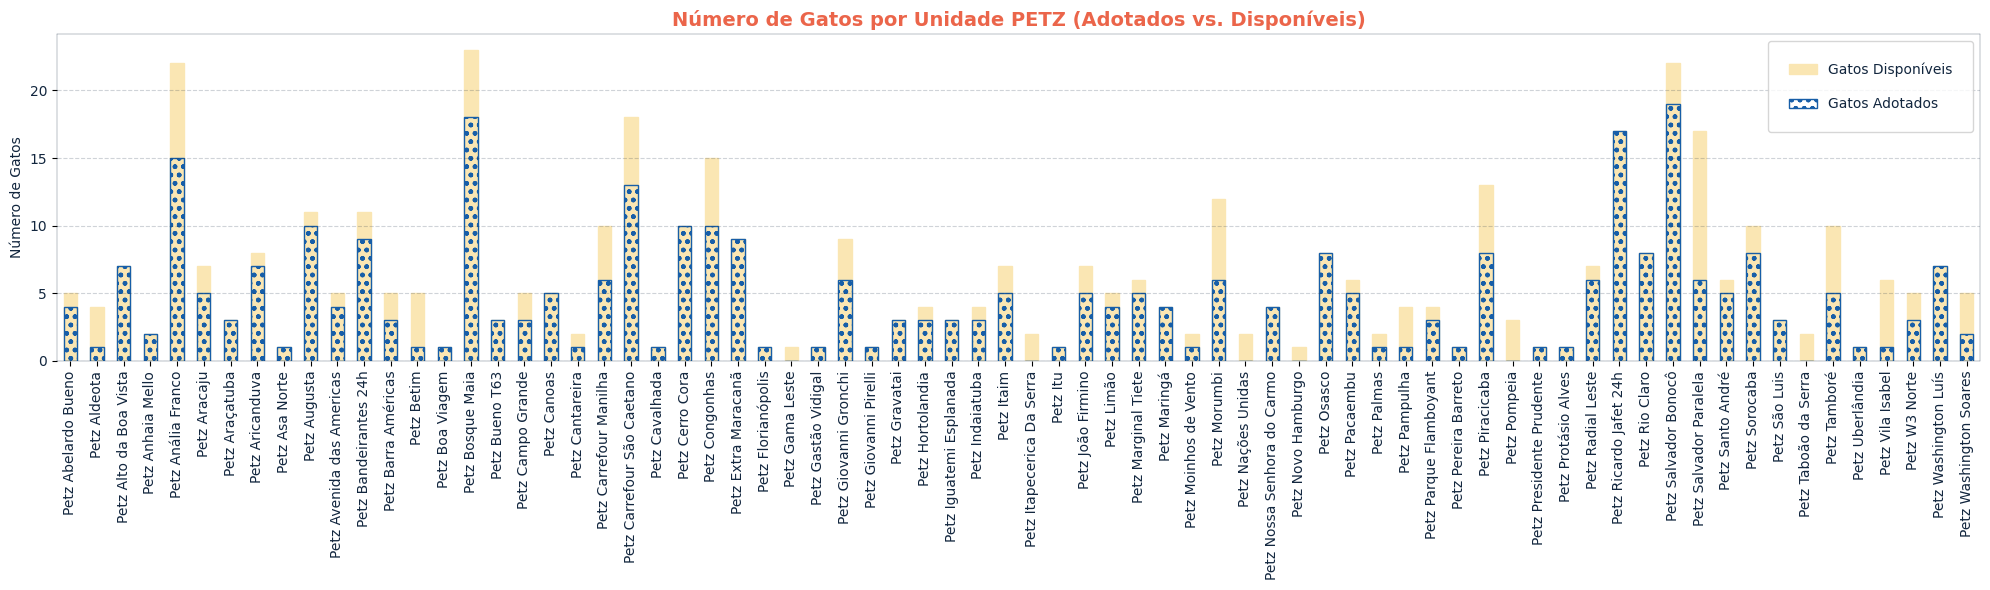

In [ ]:
#Adoções por unidade

# Agrupando os dados por unidade PETZ
adotados_unidade = adotados.groupby('UNIDADE PETZ')['mouraID'].nunique()
conjunto_analise_unidade = conjunto_analise.groupby('UNIDADE PETZ')['mouraID'].nunique()

# Criando um índice completo que contém todas as unidades de ambos os conjuntos
indice_completo = adotados_unidade.index.union(conjunto_analise_unidade.index)

# Reindexando os DataFrames para incluir todas as unidades, preenchendo com zero onde necessário
adotados_idade = adotados_unidade.reindex(indice_completo, fill_value=0)
conjunto_analise_idade = conjunto_analise_unidade.reindex(indice_completo, fill_value=0)

# Criando a figura e os eixos
plt.figure(figsize=(20, 6))

# Plotando o gráfico para 'conjunto_analise' sobre o anterior
conjunto_analise_idade.plot(kind='bar', color='#FAE6B3', edgecolor='#FAE6B3', alpha=1, label='Gatos Disponíveis')

# Plotando o gráfico para 'adotados'
adotados_idade.plot(kind='bar',  hatch='o . o .', facecolor='none', edgecolor='#175EA8', label='Gatos Adotados')

# Adicionando título e rótulos
plt.title('Número de Gatos por Unidade PETZ (Adotados vs. Disponíveis)', color='#EB654A', fontweight='bold', fontsize=14)
plt.xlabel('')
plt.ylabel('Número de Gatos', color='#12263E')
plt.xticks(rotation=90, color='#12263E')
plt.yticks(color='#12263E')

# Personalizando a cor das bordas
for spine in plt.gca().spines.values():
    spine.set_edgecolor('#12263E')  # Define a cor da borda
    spine.set_linewidth(0.2)       # Ajusta a espessura da borda

# Exibindo a legenda
legend = plt.legend(borderpad=1.5, labelspacing=1.5, frameon=True)
# Mudando a cor do texto da legenda
for text in legend.get_texts():
    text.set_color('#12263E')  # Altere 'darkorange' para a cor desejada


# Adicionando uma grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.2, color='#12263E')

# Ajustando o layout para não cortar os rótulos
plt.tight_layout()

# Exibindo o gráfico
plt.show()


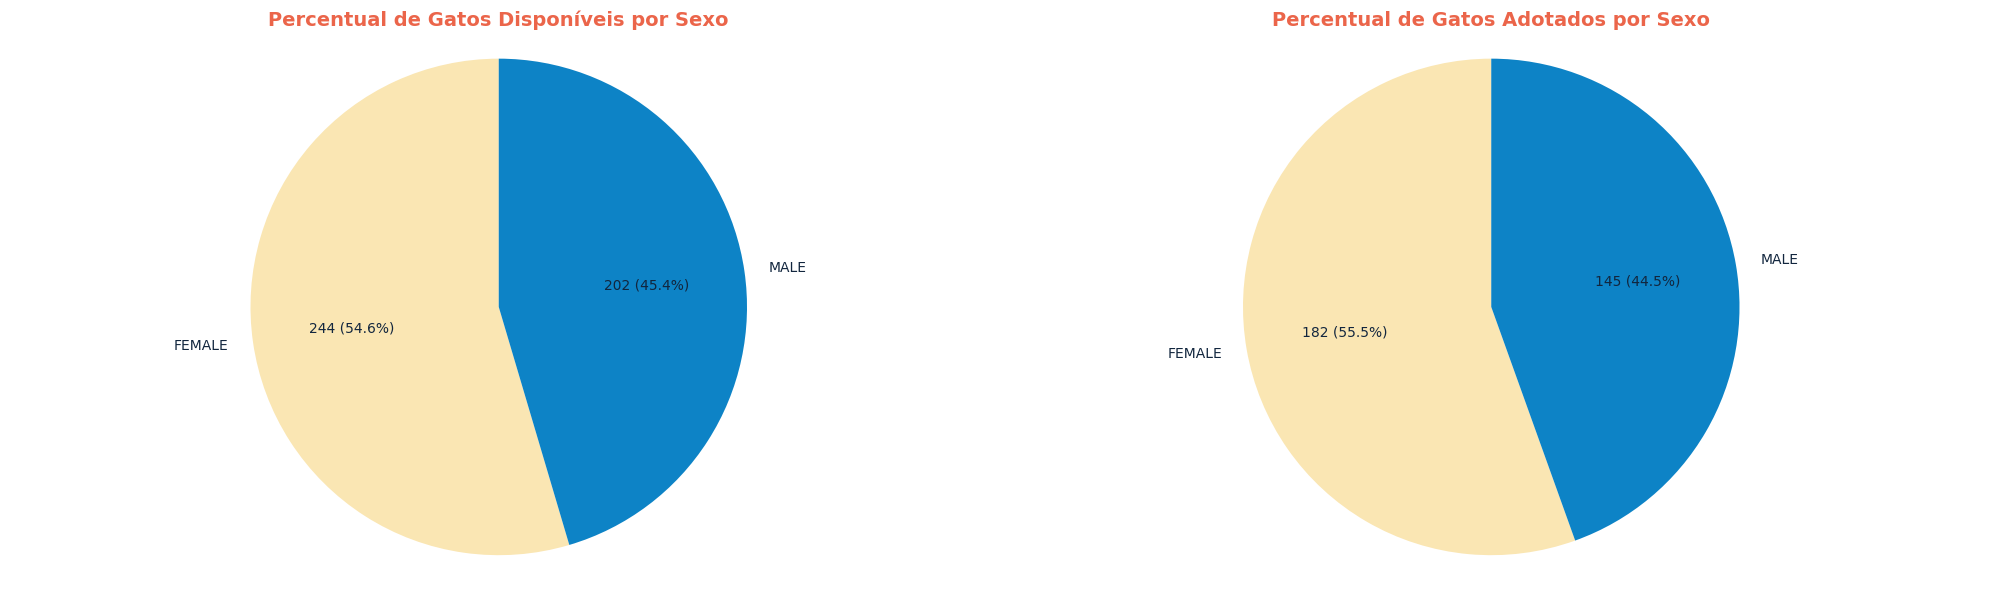

In [ ]:
# Função personalizada para exibir o número absoluto e o percentual
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))  # Número absoluto
    return f"{absolute} ({pct:.1f}%)"  # Formato: número absoluto (percentual)

# Agrupando os dados por sexo para gatos disponíveis e adotados
conjunto_analise_sexo = conjunto_analise.groupby('SEXO')['mouraID'].nunique()
adotados_sexo = adotados.groupby('SEXO')['mouraID'].nunique()

# Criando a figura e os eixos para os gráficos de pizza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de pizza para gatos disponíveis
ax1.pie(conjunto_analise_sexo,
        labels=conjunto_analise_sexo.index,
        autopct=lambda pct: func(pct, conjunto_analise_sexo),
        startangle=90,
        colors=['#FAE6B3', '#0D83C6'])
ax1.axis('equal')  # Garantir que o gráfico seja circular
ax1.set_title('Percentual de Gatos Disponíveis por Sexo', color='#EB654A', fontweight='bold', fontsize=14)

# Gráfico de pizza para gatos adotados
ax2.pie(adotados_sexo,
        labels=adotados_sexo.index,
        autopct=lambda pct: func(pct, adotados_sexo),
        startangle=90,
        colors=['#FAE6B3', '#0D83C6'])
ax2.axis('equal')  # Garantir que o gráfico seja circular
ax2.set_title('Percentual de Gatos Adotados por Sexo', color='#EB654A', fontweight='bold', fontsize=14)

# Mudando a cor dos textos (rótulos e percentuais) para #12263E
for ax in [ax1, ax2]:
    for text in ax.texts:  # Altera a cor dos textos
        text.set_color('#12263E')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

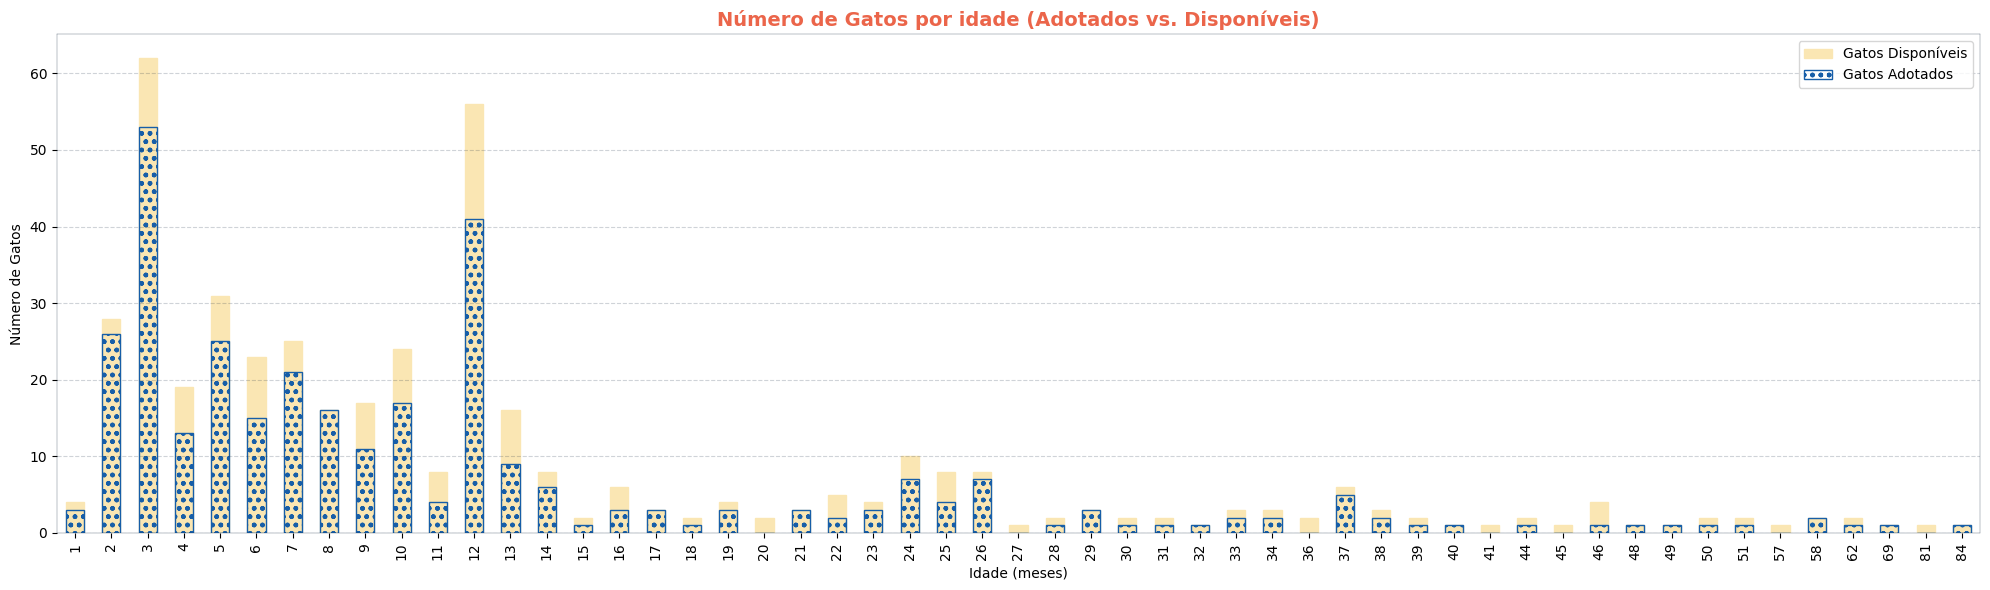

In [ ]:
#Análise de adoção por idade

# Agrupando os dados por idade
adotados_idade = adotados.groupby('IDADE (MESES)')['mouraID'].nunique()
conjunto_analise_idade = conjunto_analise.groupby('IDADE (MESES)')['mouraID'].nunique()

# Criando um índice completo que contém todas as unidades de ambos os conjuntos
indice_completo = adotados_idade.index.union(conjunto_analise_idade.index)

# Reindexando os DataFrames para incluir todas as unidades, preenchendo com zero onde necessário
adotados_idade = adotados_idade.reindex(indice_completo, fill_value=0)
conjunto_analise_idade = conjunto_analise_idade.reindex(indice_completo, fill_value=0)

# Criando a figura e os eixos
plt.figure(figsize=(20, 6))

# Plotando o gráfico para 'conjunto_analise' sobre o anterior
conjunto_analise_idade.plot(kind='bar', color='#FAE6B3', edgecolor='#FAE6B3', alpha=1, label='Gatos Disponíveis')

# Plotando o gráfico para 'adotados'
adotados_idade.plot(kind='bar',  hatch='o . o .', facecolor='none', edgecolor='#175EA8', label='Gatos Adotados')



# Adicionando título e rótulos
plt.title('Número de Gatos por idade (Adotados vs. Disponíveis)', color='#EB654A', fontweight='bold', fontsize=14)
plt.xlabel('Idade (meses)')
plt.ylabel('Número de Gatos')
plt.xticks(rotation=90)


# Personalizando a cor das bordas
for spine in plt.gca().spines.values():
    spine.set_edgecolor('#12263E')  # Define a cor da borda
    spine.set_linewidth(0.2)       # Ajusta a espessura da borda

# Exibindo a legenda
legend = plt.legend(borderpad=1.5, labelspacing=1.5, frameon=True)
# Mudando a cor do texto da legenda
for text in legend.get_texts():
    text.set_color('#12263E')  # Altere 'darkorange' para a cor desejada


# Adicionando uma grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.2, color='#12263E')


# Exibindo a legenda
plt.legend()

# Ajustando o layout para não cortar os rótulos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

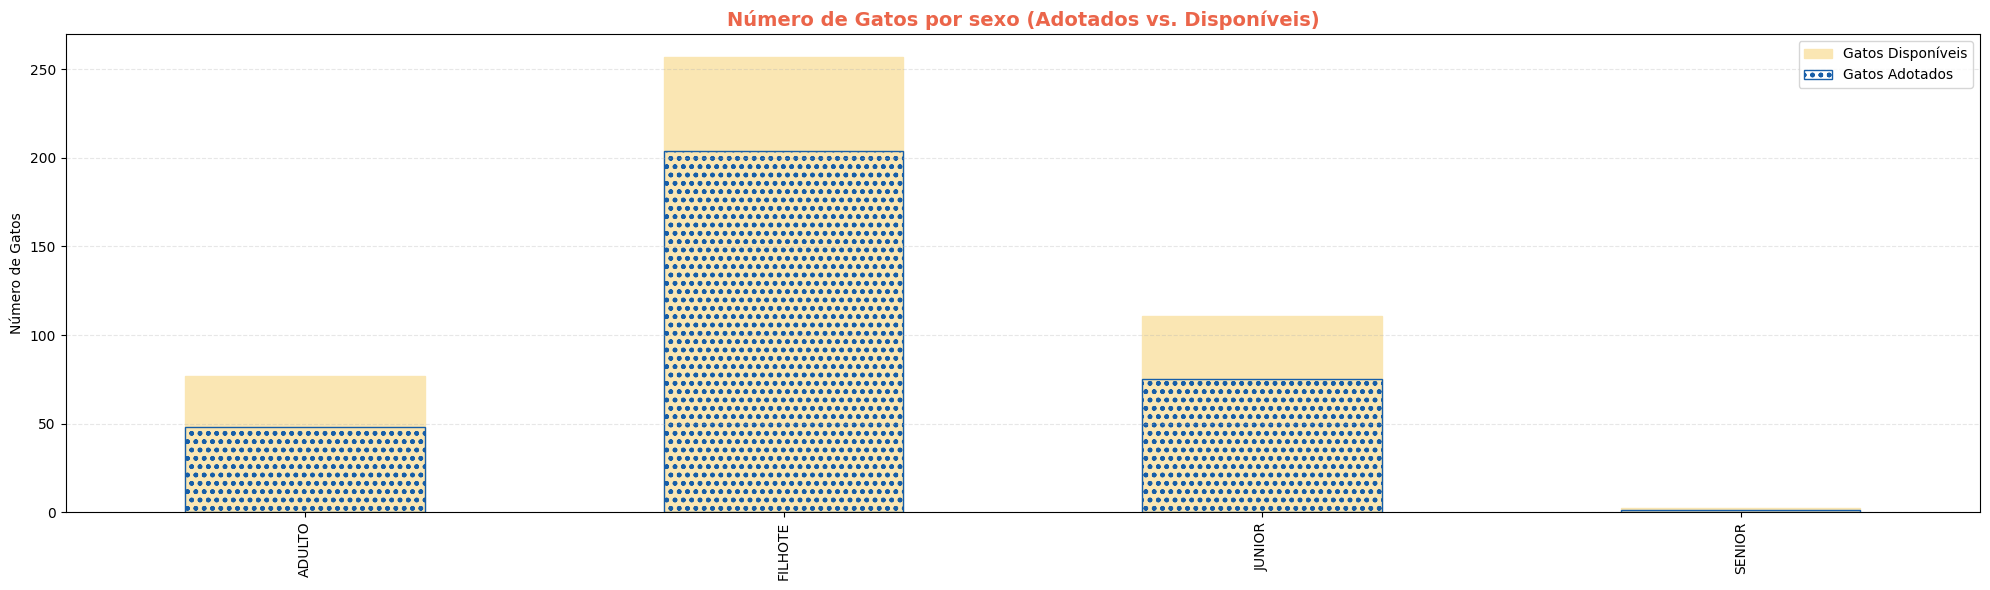

In [ ]:
#Análise de adoção por faixa etária

# Agrupando os dados por faixa etária
adotados_faixa = adotados.groupby('FAIXA ETARIA')['mouraID'].nunique()
conjunto_analise_faixa = conjunto_analise.groupby('FAIXA ETARIA')['mouraID'].nunique()

# Criando a figura e os eixos
plt.figure(figsize=(20, 6))

# Plotando o gráfico para 'conjunto_analise' sobre o anterior
conjunto_analise_faixa.plot(kind='bar', color='#FAE6B3', edgecolor='#FAE6B3', alpha=1, label='Gatos Disponíveis')

# Plotando o gráfico para 'adotados'
adotados_faixa.plot(kind='bar',  hatch='o . o .', facecolor='none', edgecolor='#175EA8', label='Gatos Adotados')

# Adicionando título e rótulos
plt.title('Número de Gatos por sexo (Adotados vs. Disponíveis)',color='#EB654A', fontweight='bold', fontsize=14)
plt.xlabel('')
plt.ylabel('Número de Gatos')
plt.xticks(rotation=90)

# Exibindo a legenda
plt.legend()

# Adicionando uma grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ajustando o layout para não cortar os rótulos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

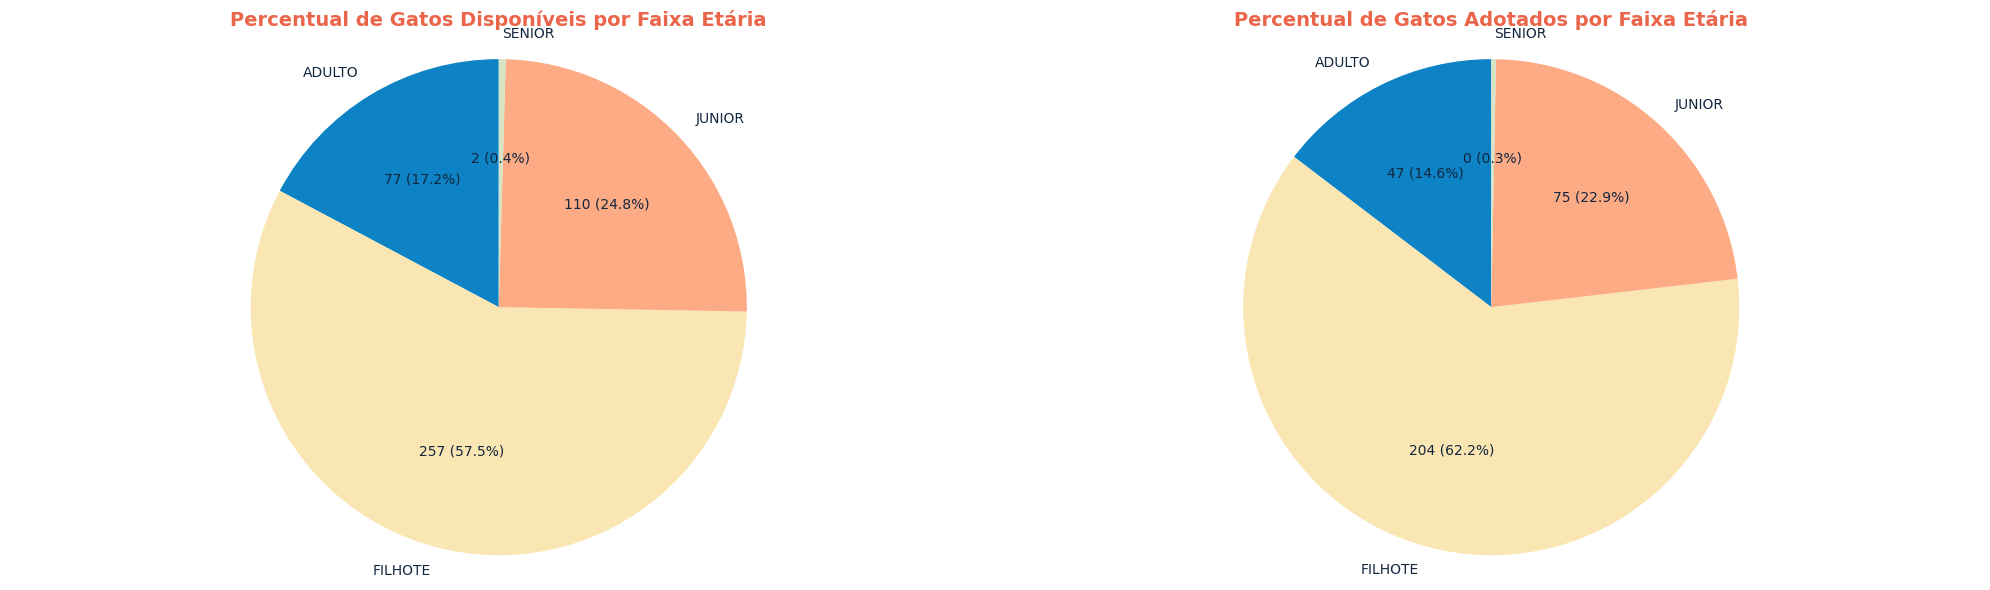

In [ ]:
# Função personalizada para exibir o número absoluto e o percentual
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))  # Número absoluto
    return f"{absolute} ({pct:.1f}%)"  # Formato: número absoluto (percentual)

# Agrupando os dados por faixa etária para gatos disponíveis e adotados
adotados_faixa = adotados.groupby('FAIXA ETARIA')['mouraID'].nunique()
conjunto_analise_faixa = conjunto_analise.groupby('FAIXA ETARIA')['mouraID'].nunique()

# Definindo as cores
cores = ['#0D83C6', '#FAE6B3', '#FDAB85', '#D5E4C7']

# Criando a figura e os eixos para os gráficos de pizza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de pizza para gatos disponíveis
wedges1, texts1, autotexts1 = ax1.pie(conjunto_analise_faixa,
                                      labels=conjunto_analise_faixa.index,
                                      autopct=lambda pct: func(pct, conjunto_analise_faixa),
                                      startangle=90,
                                      colors=cores)

# Aplicando transparência nas fatias
for wedge in wedges1:
    wedge.set_alpha(1)  # Aplica 60% de opacidade

ax1.axis('equal')  # Garantir que o gráfico seja circular
ax1.set_title('Percentual de Gatos Disponíveis por Faixa Etária', color='#EB654A', fontweight='bold', fontsize=14)

# Gráfico de pizza para gatos adotados
wedges2, texts2, autotexts2 = ax2.pie(adotados_faixa,
                                      labels=adotados_faixa.index,
                                      autopct=lambda pct: func(pct, adotados_faixa),
                                      startangle=90,
                                      colors=cores)

# Aplicando transparência nas fatias
for wedge in wedges2:
    wedge.set_alpha(1)


ax2.axis('equal')  # Garantir que o gráfico seja circular
ax2.set_title('Percentual de Gatos Adotados por Faixa Etária', color='#EB654A', fontweight='bold', fontsize=14)

# Mudando a cor dos textos (rótulos e percentuais) para #12263E
for ax in [ax1, ax2]:
    for text in ax.texts:  # Altera a cor dos textos
        text.set_color('#12263E')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

FAIXA ETARIA
SENIOR     2.000000
ADULTO     1.583333
JUNIOR     1.213333
FILHOTE    1.034314
Name: PERMANÊNCIA, dtype: float64


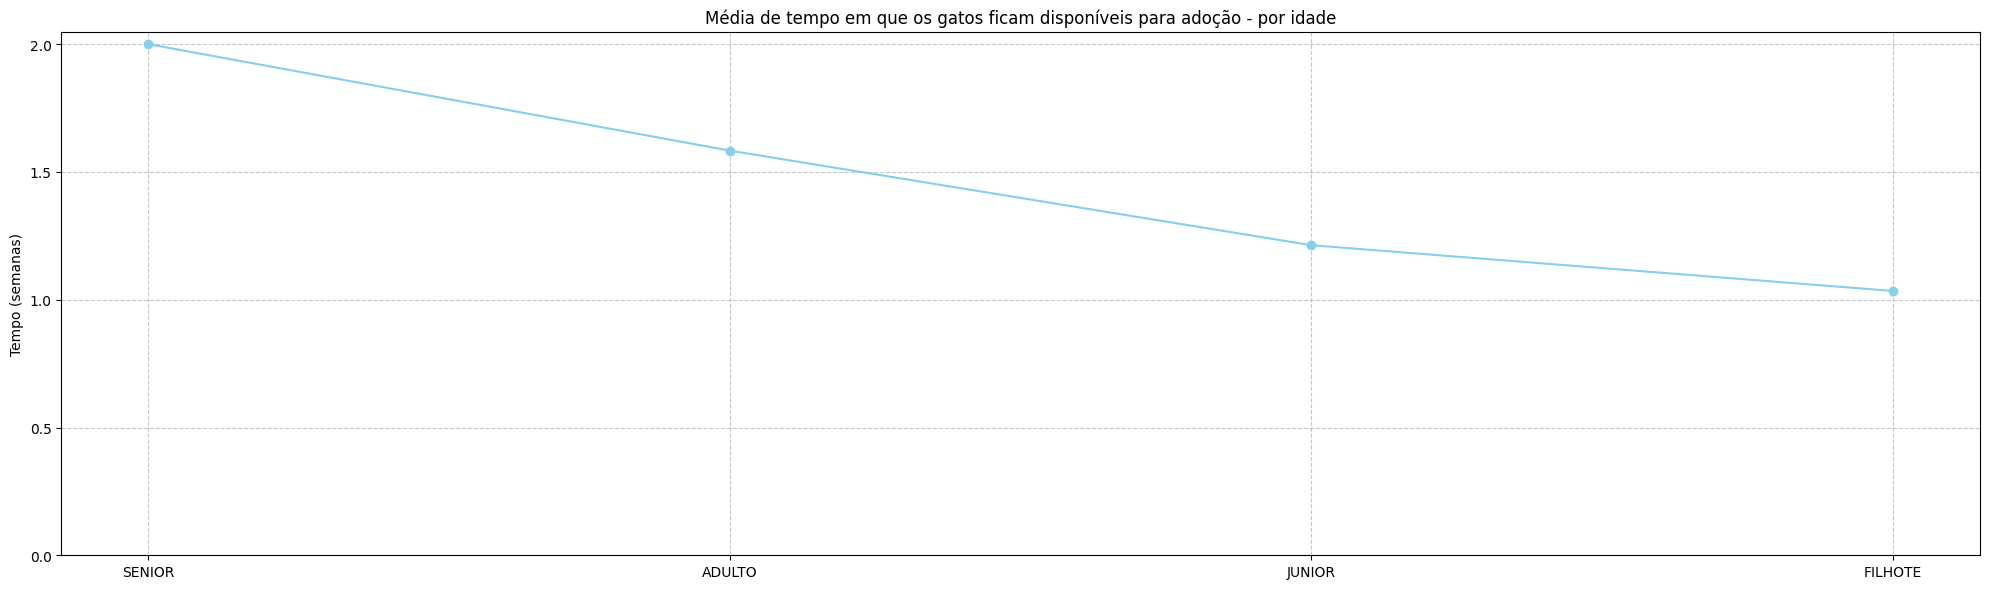

In [ ]:
#Analise inicial de tempo de permanência na unidade e idade

#Agrupando os dados
tempo_adocao = adotados.groupby('FAIXA ETARIA')['PERMANÊNCIA'].mean() #considerando o conjunto total, incluindo os não adotados
tempo_adocao = tempo_adocao.sort_values(ascending=False)
print(tempo_adocao)


# Criando o gráfico de linhas
plt.figure(figsize=(20, 6))
plt.plot(tempo_adocao.index, tempo_adocao.values, marker='o', color='#87CEEB')
plt.title('Média de tempo em que os gatos ficam disponíveis para adoção - por idade')
plt.xlabel('')
plt.ylabel('Tempo (semanas)')
plt.xticks(tempo_adocao.index)  # Mostra todos os meses no eixo x
# Definindo o eixo y para exibir intervalos de 0.5
max_y = tempo_adocao.values.max() + 0.5  # Define um máximo no eixo y para incluir todos os pontos
plt.yticks(np.arange(0, max_y, 0.5))  # Define intervalos de 0.5
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta o layout
plt.show()